# Convert Ascii raster into Dfs2

1. Unzip the zippped file Ascii file (Slottskogen.asc.zip)
2. Read the Ascii file into a numpy array
3. Create a grid with the specs from the Ascii file
4. Create a DataArray with the data from the Ascii file
5. Create a Dfs2 file

In [1]:
import mikeio
import numpy as np

## 1. Unzip the zippped file Ascii file (Slottskogen.asc.zip)

In [2]:
# unzip the file
import zipfile

with zipfile.ZipFile("../tests/testdata/Slottskogen.asc.zip", "r") as f:
    f.extractall(".")

## 2. Read the Ascii file into a numpy array

In [3]:
# look at the content of the ascii file

filename = "Slottskogen.asc"

f = open(filename, "r")
file_contents = f.read()
print(file_contents[:300])  # print the first 300 caracters of the Ascii file
f.close()

ncols        400
nrows        200
xllcorner    146200.000000000000
yllcorner    6396500.000000000000
cellsize     0.500000000000
NODATA_value  -9999
 36.43000030517578125 35.95999908447265625 35.770000457763671875 35.659999847412109375 35.5800018310546875 35.529998779296875 35.470001220703125 35.459


In [4]:
# We observe that the fist 6 lines are the raster attributes and that fom line 6 starts the array

# Import the array with numpy
data = np.loadtxt(filename, skiprows=6)

# Import the attributes
with open(filename, "r") as file:
    ncols = int(file.readline().split()[1])
    nrows = int(file.readline().split()[1])
    xllcorner = float(file.readline().split()[1])
    yllcorner = float(file.readline().split()[1])
    cellsize = float(file.readline().split()[1])
    NODATA_value = float(file.readline().split()[1])

In [5]:
# Reshape the data into a 2D array
array = np.reshape(data, (nrows, -ncols))

# Inverse the y axis
array = array[::-1, :]

## 3. Create a grid with the specs from the Ascii file

In [6]:
# Define the geometry. As dfs2 uses the center of the fist cell for its origin wile the ascii file uses the lower left corner, add a shift equal to half the cellsize.
geometry = mikeio.Grid2D(
    nx=ncols,
    ny=nrows,
    dx=cellsize,
    dy=cellsize,
    origin=(xllcorner + (cellsize / 2), yllcorner + (cellsize / 2)),
    projection='PROJCS["SWEREF99_12_00",GEOGCS["GCS_SWEREF99",DATUM["D_SWEREF99",SPHEROID["GRS_1980",6378137.0,298.257222101]],PRIMEM["Greenwich",0.0],UNIT["Degree",0.0174532925199433]],PROJECTION["Transverse_Mercator"],PARAMETER["False_Easting",150000.0],PARAMETER["False_Northing",0.0],PARAMETER["Central_Meridian",12.0],PARAMETER["Scale_Factor",1.0],PARAMETER["Latitude_Of_Origin",0.0],UNIT["Meter",1.0]]',
)
geometry

<mikeio.Grid2D>
x: [1.462e+05, 1.462e+05, ..., 1.464e+05] (nx=400, dx=0.5)
y: [6.397e+06, 6.397e+06, ..., 6.397e+06] (ny=200, dy=0.5)
projection: PROJCS["SWEREF99_12_00",GEOGCS["GCS_SWEREF99",DATUM["D_SWEREF99",SPHEROID["GRS_1980",6378137.0,298.257222101]],PRIMEM["Greenwich",0.0],UNIT["Degree",0.0174532925199433]],PROJECTION["Transverse_Mercator"],PARAMETER["False_Easting",150000.0],PARAMETER["False_Northing",0.0],PARAMETER["Central_Meridian",12.0],PARAMETER["Scale_Factor",1.0],PARAMETER["Latitude_Of_Origin",0.0],UNIT["Meter",1.0]]

## 4. Create a DataArray with the data from the Ascii file

In [7]:
# Now the geometry is set and we can define the whole array
da = mikeio.DataArray(
    data=array,
    item=mikeio.ItemInfo("Elevation", mikeio.EUMType.Elevation),
    geometry=geometry,
    dims=("y", "x"),  # No time dimension
)
da

<mikeio.DataArray>
name: Elevation
dims: (y:200, x:400)
time: 2018-01-01 00:00:00 (time-invariant)
geometry: Grid2D (ny=200, nx=400)

<Axes: xlabel='Easting [m]', ylabel='Northing [m]'>

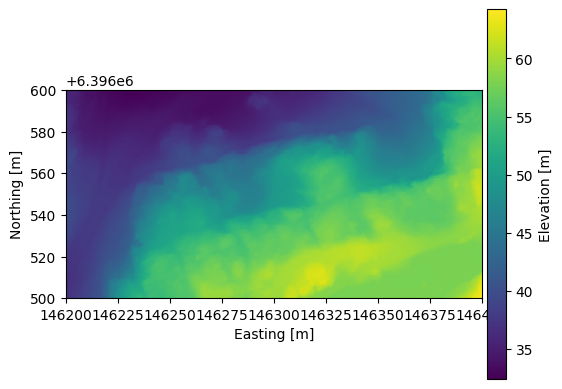

In [8]:
# plot the data array
da.plot()

## 5. Create a Dfs2 file

In [9]:
# the Mikeio array can be saved as a dfs2
da.to_dfs("Slottskogen.dfs2")

## Clean up

In [10]:
import os

os.remove("Slottskogen.asc")
os.remove("Slottskogen.dfs2")